In [18]:
import os

def print_file_structure(path, indent=""):
    for entry in os.listdir(path):
        entry_path = os.path.join(path, entry)
        if os.path.isdir(entry_path):
            print(indent + "├── " + entry + "/")
            print_file_structure(entry_path, indent + "│   ")
        else:
            print(indent + "├── " + entry)
    print(indent + "└──")

# 替换为你实际的路径
target_path = r"C:\Users\olle\Desktop\stroke\archive\data_new\P01"
print_file_structure(target_path)

├── Rch_Sd2Sd_Bck_L_1/
│   ├── Joint_Positions.csv
│   ├── Labels.csv
│   └──
├── Rch_Sd2Sd_Bck_L_2/
│   ├── Joint_Positions.csv
│   ├── Labels.csv
│   └──
├── Rch_Sd2Sd_Bck_R_1/
│   ├── Joint_Positions.csv
│   ├── Labels.csv
│   └──
├── Rch_Sd2Sd_Bck_R_2/
│   ├── Joint_Positions.csv
│   ├── Labels.csv
│   └──
└──


In [19]:
import os
import numpy as np
import pandas as pd

# 定义目标路径
target_paths = [r"C:\Users\olle\Desktop\stroke\archive\data_new\H01", r"C:\Users\olle\Desktop\stroke\archive\data_new\P01"]

# 初始化空列表来存储关节位置数据和标签数据
all_joint_positions = []
all_labels = []

# 遍历每个目标路径
for target_path in target_paths:
    # 遍历目标路径下的所有文件夹
    for root, dirs, files in os.walk(target_path):
        if 'Joint_Positions.csv' in files and 'Labels.csv' in files:
            # 读取 Joint_Positions.csv 文件
            joint_positions_file = os.path.join(root, 'Joint_Positions.csv')
            joint_positions = pd.read_csv(joint_positions_file, header=None).values
            num_matrices = joint_positions.shape[0] // 25
            joint_positions = joint_positions.reshape(num_matrices, 25, 3)

            # 读取 Labels.csv 文件
            labels_file = os.path.join(root, 'Labels.csv')
            labels = pd.read_csv(labels_file, header=None).values.flatten()

            # 确保关节位置数据和标签数据的数量一致
            assert joint_positions.shape[0] == len(labels), f"数据不匹配: {root}"

            # 将数据添加到总列表中
            all_joint_positions.extend(joint_positions)
            all_labels.extend(labels)

# 将列表转换为 numpy 数组
all_joint_positions = np.array(all_joint_positions)
all_labels = np.array(all_labels)

# 打印数据集的形状
print(f"关节位置数据形状: {all_joint_positions.shape}")
print(f"标签数据形状: {all_labels.shape}")

关节位置数据形状: (8216, 25, 3)
标签数据形状: (8216,)


Epoch 1/30


C:\Users\olle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4656 - loss: 0.7435 - val_accuracy: 0.8485 - val_loss: 0.4499
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8558 - loss: 0.4384 - val_accuracy: 0.8747 - val_loss: 0.3887
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8924 - loss: 0.3687 - val_accuracy: 0.9002 - val_loss: 0.3436
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8983 - loss: 0.3603 - val_accuracy: 0.8990 - val_loss: 0.3535
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9056 - loss: 0.3390 - val_accuracy: 0.9002 - val_loss: 0.3405
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9026 - loss: 0.3445 - val_accuracy: 0.8978 - val_loss: 0.3556
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9039 - loss: 0.3388 - val_accuracy: 0.9002 - val_loss: 0.3378
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8996 - loss: 0.3476 - val_accuracy: 0.8990 - val_loss: 0.3505
Epo

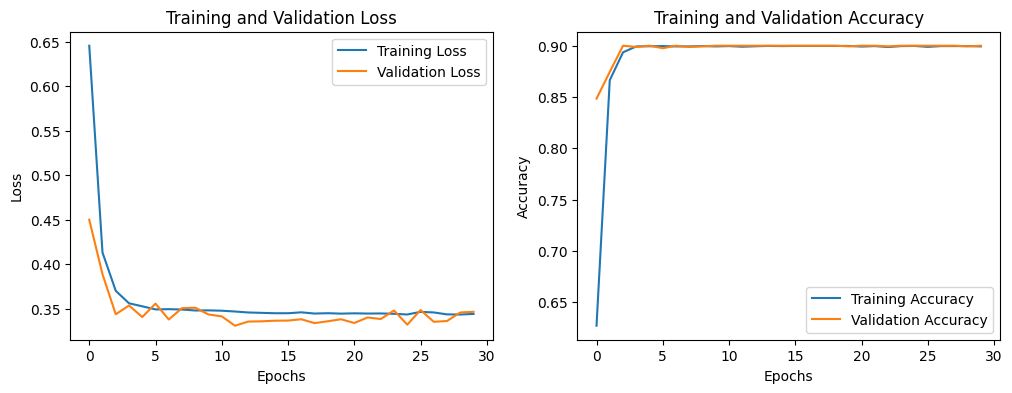

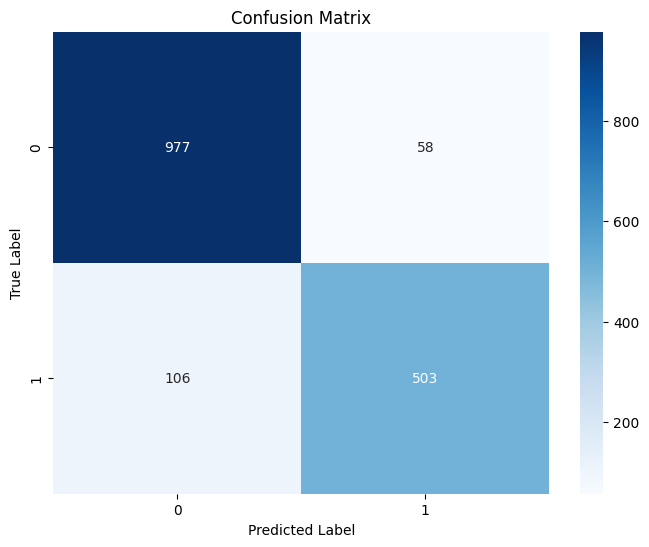

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.utils.class_weight import compute_class_weight

# 定义目标路径
target_paths = ["./archive/data_new/H01", "./archive/data_new/P01"]

# 初始化空列表来存储关节位置数据和标签数据
all_joint_positions = []
all_labels = []

# 遍历每个目标路径
for target_path in target_paths:
    # 遍历目标路径下的所有文件夹
    for root, dirs, files in os.walk(target_path):
        if 'Joint_Positions.csv' in files and 'Labels.csv' in files:
            # 读取 Joint_Positions.csv 文件
            joint_positions_file = os.path.join(root, 'Joint_Positions.csv')
            joint_positions = pd.read_csv(joint_positions_file, header=None).values
            num_matrices = joint_positions.shape[0] // 25
            joint_positions = joint_positions.reshape(num_matrices, 25, 3)

            # 根据路径设置标签
            if target_path == "./archive/data_new/H01":
                labels = np.zeros(num_matrices, dtype=int)
            else:
                labels = np.ones(num_matrices, dtype=int)

            # 确保关节位置数据和标签数据的数量一致
            assert joint_positions.shape[0] == len(labels), f"数据不匹配: {root}"

            # 将数据添加到总列表中
            all_joint_positions.extend(joint_positions)
            all_labels.extend(labels)

# 将列表转换为 numpy 数组
all_joint_positions = np.array(all_joint_positions)
all_labels = np.array(all_labels)

num_to_shuffle = int(len(all_labels) * 0.1)
indices_to_shuffle = np.random.choice(len(all_labels), num_to_shuffle, replace=False)
for idx in indices_to_shuffle:
    all_labels[idx] = 1 - all_labels[idx]  

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(all_joint_positions, all_labels, test_size=0.2, random_state=42)

# 计算类别权重
class_weights = compute_class_weight('balanced', classes=np.unique(all_labels), y=all_labels)
class_weight_dict = dict(enumerate(class_weights))

# 构建 RNN 模型
model = Sequential([
    SimpleRNN(32, input_shape=(25, 3)),
    Dense(1, activation='sigmoid')
])

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型，使用类别权重
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test),
                    class_weight=class_weight_dict)

# 预测测试集
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4).astype(int)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 绘制训练过程的 loss 和 acc 曲线
plt.figure(figsize=(12, 4))

# 绘制 loss 曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制 acc 曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 绘制混淆矩阵图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [64]:
# 选择测试集的一条数据
sample_index = 30  # 可以修改这个索引选择不同的数据
sample_data = X_test[sample_index:sample_index+1]

# 进行预测得到概率值
probability = model.predict(sample_data)[0][0]

# 根据概率值得到预测类别
predicted_class = 1 if probability > 0.4 else 0

# 计算置信度
# confidence = probability if probability >= 0.5 else 1 - probability
confidence= 1 - probability
# 将置信度保留两位小数并转换为百分比形式
formatted_confidence = "{:.2f}%".format(confidence * 100)

print(f"预测类别: {predicted_class}")
print(f"动作完成度: {formatted_confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
预测类别: 0
动作完成度: 81.03%
